In [2]:
from __future__ import division, print_function, unicode_literals
import pandas as pd

In [12]:
s=pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [13]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [7]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [8]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [9]:
s<0

0    False
1     True
2    False
3    False
dtype: bool

In [15]:
s2 = pd.Series(data=[68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [23]:
s2['bob']

83

In [48]:
s3 = s2[1:3]
s3

bob         83
charles    112
dtype: int64

In [22]:
s2.loc['bob']

83

In [24]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [31]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [25]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [50]:
surprise_slice=surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

In [42]:
surprise_slice.iloc[0]

1002

In [32]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

In [36]:
s3.keys()

Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')

In [34]:
s2.keys()

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')

In [35]:
s2 + s3

alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [38]:
s5 = pd.Series([1000,1000,1000,1000],index=["alice", "bob", "charles", "darwin"])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice      1068
bob        1083
charles    1112
darwin     1068
dtype: int64

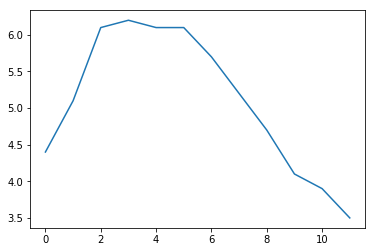

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
pd.Series(temperatures).plot()
#s7.plot()
plt.show()

In [141]:
pd.Series(np.arange(1,26)).sum()
#np.arange(1,26)

325

In [74]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')

temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

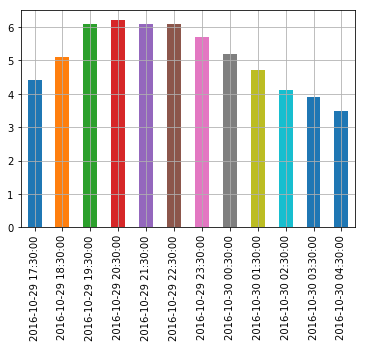

In [75]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

In [76]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, base=0]

In [77]:
temp_series_freq_2H = temp_series_freq_2H.mean()

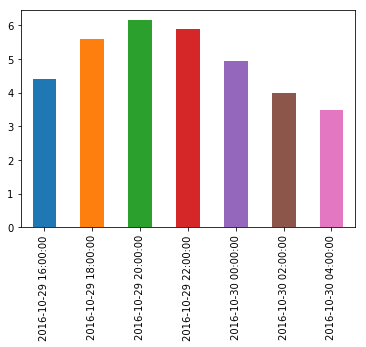

In [78]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

In [81]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [91]:
people.loc[["alice","bob"],["birthyear","hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing


In [144]:
people.loc["alice","hobby"]

'Biking'

In [99]:
people.iloc[:,[1,2]]

,birthyear,children
alice,1985,NaN
bob,1984,3.0
charles,1992,0.0


In [86]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [100]:
d4 = pd.DataFrame(people,columns=["hobby", "children"])
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3.0
charles,NaN,0.0


In [102]:
d5=people.iloc[:,[1,2]]
d5

,birthyear,children
alice,1985,NaN
bob,1984,3.0
charles,1992,0.0


In [121]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

In [122]:
d5["public"]["hobby"]

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: hobby, dtype: object

In [113]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
London charles       1992      NaN     112       0.0
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0

In [123]:
d6 = d5.T
d6

London   Paris         
                  charles   alice      bob
public  birthyear    1992    1985     1984
        hobby         NaN  Biking  Dancing
private weight        112      68       83
        children        0     NaN        3

In [124]:
d7 = d6.stack()
d7

London    Paris
public  birthyear alice      NaN     1985
                  bob        NaN     1984
                  charles   1992      NaN
        hobby     alice      NaN   Biking
                  bob        NaN  Dancing
private weight    alice      NaN       68
                  bob        NaN       83
                  charles    112      NaN
        children  bob        NaN        3
                  charles      0      NaN

In [125]:
d8 = d5.stack()
d8

private   public
London charles birthyear      NaN     1992
               children       0.0      NaN
               weight       112.0      NaN
Paris  alice   birthyear      NaN     1985
               hobby          NaN   Biking
               weight        68.0      NaN
       bob     birthyear      NaN     1984
               children       3.0      NaN
               hobby          NaN  Dancing
               weight        83.0      NaN

In [126]:
d5

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

In [131]:
d8.unstack()

private                          public                    \
               birthyear children hobby weight birthyear children    hobby   
London charles       NaN      0.0   NaN  112.0      1992      NaN      NaN   
Paris  alice         NaN      NaN   NaN   68.0      1985      NaN   Biking   
       bob           NaN      3.0   NaN   83.0      1984      NaN  Dancing   

                       
               weight  
London charles    NaN  
Paris  alice      NaN  
       bob        NaN

In [149]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


In [133]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


In [150]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [151]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [155]:
(grades==10).any(axis=1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

In [156]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [157]:
grades.mean(axis=1)

alice      8.333333
bob        9.333333
charles    4.666667
darwin     9.666667
dtype: float64

In [160]:
grades.values.mean()

8.0

In [162]:
bonus_array  = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [213]:
more_grades = pd.DataFrame({
    "name": ["alice","bob","charles"]*3,
    "month": months,
    "grade": np.arange(0,9),
    "bonus": 2*np.arange(0,9)  
})
more_grades

,name,month,grade,bonus
0,alice,sep,0,0
1,bob,sep,1,2
2,charles,sep,2,4
3,alice,oct,3,6
4,bob,oct,4,8
5,charles,oct,5,10
6,alice,nov,6,12
7,bob,nov,7,14
8,charles,nov,8,16


In [219]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)

,bonus,grade
name,,
alice,12,6
bob,14,7
charles,16,8


In [233]:
grade_pivot=pd.pivot_table(more_grades, index="name", values=["grade","bonus"], columns="month", margins=True)
grade_pivot

bonus             grade            
month     nov oct sep All   nov oct sep All
name                                       
alice      12   6   0   6     6   3   0   3
bob        14   8   2   8     7   4   1   4
charles    16  10   4  10     8   5   2   5
All        14   8   2   8     7   4   1   4

In [234]:
grade_pivot.stack()

bonus  grade
name    month              
alice   All        6      3
        nov       12      6
        oct        6      3
        sep        0      0
bob     All        8      4
        nov       14      7
        oct        8      4
        sep        2      1
charles All       10      5
        nov       16      8
        oct       10      5
        sep        4      2
All     All        8      4
        nov       14      7
        oct        8      4
        sep        2      1

In [237]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

bonus  grade
name    month              
alice   nov       12      6
        oct        6      3
        sep        0      0
bob     nov       14      7
        oct        8      4
        sep        2      1
charles nov       16      8
        oct       10      5
        sep        4      2
All                8      4